# Chapter 5 : 행렬로 변환 계산하기

## 5.1 행렬로 일차변환 표현하기

### 5.1.1 벡터와 일차변환을 행렬로 표기하기

In [1]:
B = (
    (0,2,1), 
    (0,1,0), 
    (1,0,-1))
v = (3,-2,5)

In [2]:
list(zip(*B))

[(0, 0, 1), (2, 1, 0), (1, 0, -1)]

### 5.1.2 행렬과 벡터 곱하기

벡터들의 일차결합은 4.2.5절 [연습문제 4.19]에 등장한 linear_combination 함수를 사용해서 구할 수 있다.\
linear_combination의 첫 번째 인자는 스칼라의 리스트인 v이어야 하며, 후속 인자는 B의 열벡터이어야 한다.

In [3]:
from vectors import *
def linear_combination(scalars,*vectors):
    scaled = [scale(s,v) for s,v in zip(scalars,vectors)]
    return add(*scaled)

In [4]:
def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

In [5]:
multiply_matrix_vector(B,v)

(1, -2, -2)

### 5.1.3 행렬 곱으로 일차변환 합성하기

### 5.1.4 행렬 곱 구현하기

In [6]:
from vectors import *
def matrix_multiply(a, b):
    return tuple(
        tuple(dot(row,col) for col in zip(*b))
        for row in a
    )

In [7]:
a = ((1,1,0), (1,0,1),(1,-1,1))

In [8]:
b = ((0,2,1), (0,1,0), (1,0,-1))

In [9]:
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [10]:
c = ((1,2), (3,4))

In [11]:
d = ((0,-1), (1,0))

In [12]:
matrix_multiply(c,d)

((2, -1), (4, -3))

### 5.1.5 행렬 변환을 통한 3차원 애니메이션

In [55]:
from teapot import load_triangles
from draw_model import draw_model
from math import sin,cos
import pygame

def get_rotation_matirx(t):
    seconds = t/1000 # 시각을 초 단위로 변경해서 변환이 너무 빨리 일어나지 않도록 한다.
    return(
        (cos(seconds), 0, -sin(seconds)),
        (0,1,0),
        (sin(seconds), 0, cos(seconds))
    )

: 

In [15]:
!python animate_teapot.py

pygame 2.1.0 (SDL 2.0.16, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 5.1.6 연습문제

5.1 함수 infer_matrix(n, transformation)를 작성하라.\
이 함수는 (2차원이나 3차원같이) 차원과 일차변환으로 가정된 벡터 변환을 입력으로 받는다.

In [16]:
def infer_matrix(n, transformation):
    def standard_basis_vector(i):
        # i번째 좌표만 1이고 나머지 좌표는 0인 튜플로 i번째 표준 기저 벡터를 생성한다.
        return tuple(1 if i==j else 0 for j in range(1,n+1))
    # n개의 벡터로 이루어진 리스트로 표준 기저를 생성한다.
    standard_basis = [standard_basis_vector(i) for i in range(1,n+1)]
    # 표준 기저 벡터에 대응하는 일차변환을 적용한 결과를 행렬의 열벡터로 정의한다.
    cols = [transformation(v) for v in standard_basis]
    # 관례에 따라 열벡터 리스트 대신 행에 대한 튜플로 행렬을 재형성한다.
    return tuple(zip(*cols))

In [17]:
from transforms import rotate_z_by

In [18]:
from math import pi

In [19]:
infer_matrix(3, rotate_z_by(pi/2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

5.3 주어진 크기대로 랜덤 정수 성분으로 구성된 행렬을 만드는 random_matrix 함수를 작성하라.

In [20]:
from random import randint
def random_matrix(rows, cols, min=-2, max=2):
    return tuple(
        tuple(
        randint(min,max) for j in range(0,cols))
        for i in range(0,rows)
    )

In [21]:
random_matrix(3,3,0,10)

((9, 1, 1), (2, 8, 6), (9, 6, 10))

5.6 행렬 ((2,1,1), (1,2,1), (1,1,2))를 찻주전자를 정의하는 모든 벡터에 적용하라.

In [22]:
def transform(v):
    m = ((2,1,1),(1,2,1),(1,1,2))
    return multiply_matrix_vector(m,v)

In [23]:
!python matrix_transform_teapot.py

pygame 2.1.0 (SDL 2.0.16, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


5.10 $$A = \left(\begin{array}{ccc}1&1&0\\1&0&1\\1&-1&1\end{array}\right) \quad \text{and} \quad B = \left(\begin{array}{ccc}0&2&1\\0&1&0\\1&0&-1\end{array}\right)$$
A에 대한 일차변환과 B에 대한 일차변환의 합성응ㄹ 수행하는 함수 compose_a_b를 작성하라.\
이후 [연습문제 5.1]에 등장한 infer_matrix 함수를 사용해 infer_matrix(3, compose_a_b)가 행렬곱 AB과 동일함을 보여라.

In [24]:
from transforms import compose
a = ((1,1,0),(1,0,1),(1,-1,1))
b = ((0,2,1),(0,1,0),(1,0,-1))

In [25]:
def transform_a(v):
    return multiply_matrix_vector(a,v)

def transform_b(v):
    return multiply_matrix_vector(b,v)

compose_a_b = compose(transform_a, transform_b)

In [26]:
infer_matrix(3,compose_a_b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [27]:
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

5.12 주어진 행렬을 특정(자연수) 지수만큼 거듭제곱하는 matrix_power(power,matrix) 함수를 작성하라.

In [28]:
def matrix_power(power,matrix):
    result = matrix
    for _ in range(1,power):
        result = matrix_multiply(result,matrix)
    return result

## 5.2 서로 다른 크기의 행렬 해석하기

In [29]:
a = ((-1, 0, -1, -2, -2), (0, 0, 2, -2, 1), (-2, -1, -2, 0, 1), (0, 2, -2, -1, 0), (1, 1, -1, -1, 0))
b = ((-1, 0, -1, -2, -2), (0, 0, 2, -2, 1), (-2, -1, -2, 0, 1), (0, 2, -2, -1, 0), (1, 1, -1, -1, 0))

In [30]:
matrix_multiply(a,b)

((1, -5, 9, 6, 1),
 (-3, -5, -1, 1, 2),
 (7, 3, 3, 5, 1),
 (4, 0, 10, -3, 0),
 (1, -1, 5, -3, -2))

### 5.2.1 행렬로 바라보는 열벡터

In [31]:
c = ((-1,-1,0), (-2,1,2), (1,0,-1))
d = ((1,),(1,),(1,))

In [32]:
matrix_multiply(c,d)

((-2,), (1,), (0,))

In [33]:
multiply_matrix_vector(c,(1,1,1))

(-2, 1, 0)

### 5.2.6 연습문제

5.18 열벡터를 행벡터로 변환하고 행벡터를 열벡터로 변환하는 함수를 작성하라.\
이런 식으로 행렬을 뒤집는 것을 전치(transposition)라고 하며, 결과 행렬을 원래 행렬의 전치행렬 또는 간단히 전치(transpose)라고 한다.

In [34]:
def transpose(matrix):
    return tuple(zip(*matrix))

In [35]:
transpose(((1,),(2,),(3,)))

((1, 2, 3),)

In [36]:
transpose(((1,2,3),))

((1,), (2,), (3,))

## 5.3 행렬로 벡터를 평행이동하기

### 5.3.1 평면에서의 평행이동을 일차변환으로 만들기

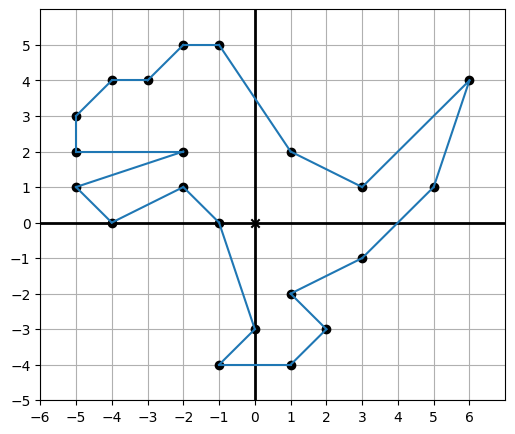

In [37]:
from vector_drawing import *

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

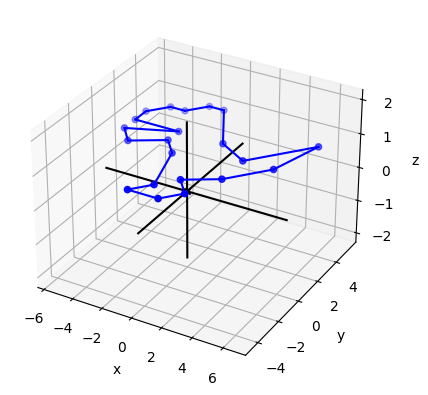

In [38]:
from draw3d import draw3d, Points3D, Segment3D

def polygon_segments_3d(points,color='blue'):
    count = len(points)
    return [Segment3D(points[i], points[(i+1) % count],color=color) for i in range(0,count)]

dino_3d = [(x,y,1) for x,y in dino_vectors]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d),
    save_as='figures/5.25.svg'
)

In [39]:
magic_matrix = (
    (1,0,3),
    (0,1,1),
    (0,0,1))
translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]

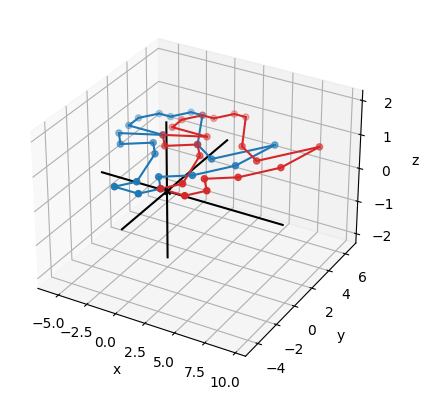

In [40]:
draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d,color='C0'),
    Points3D(*translated,color='C3'),
    *polygon_segments_3d(translated,color='C3'),
    save_as='figures/5.27.svg'
)

In [41]:
translated_2d = [(x,y) for (x,y,z) in translated]

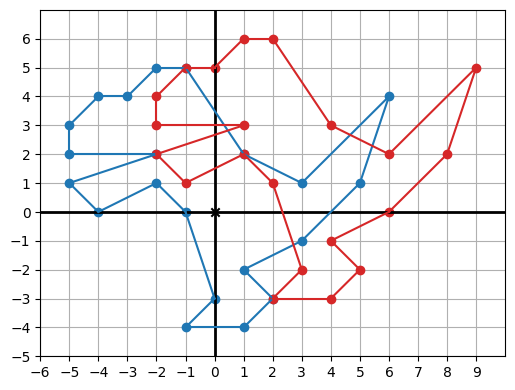

In [42]:
draw(
    Points(*dino_vectors,color='C0'),
    Polygon(*dino_vectors,color='C0'),
    Points(*translated_2d, color='C3'),
    Polygon(*translated_2d, color='C3'),
    save_as='figures/5.28.svg'
)

### 5.3.2 2차원 평행이동에 대한 3차원 행렬 구하기

### 5.3.3 다른 일차변환과 평행이동 결합하기

In [43]:
rotate_and_translate = ((0,-1,3),(1,0,1),(0,0,1))
rotated_translated_dino = [
    multiply_matrix_vector(rotate_and_translate, v) 
    for v in dino_3d]

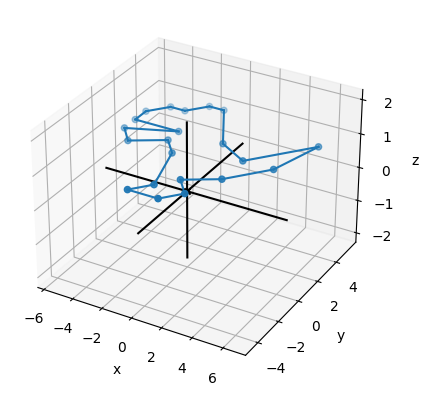

In [44]:
draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d, color='C0'),
    save_as='figures/5.32a.svg'
)

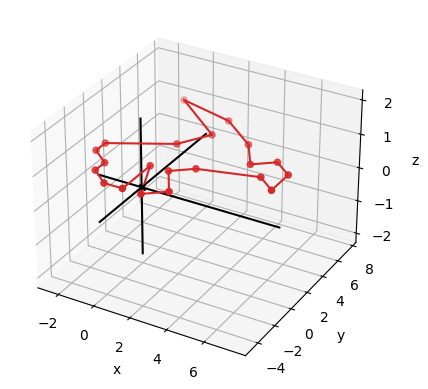

In [45]:
draw3d(
    Points3D(*rotated_translated_dino, color='C3'),
    *polygon_segments_3d(rotated_translated_dino, color='C3'),
    save_as='figures/5.32b.svg'
)

### 5.3.4 4차원 세계에서 3차원 객체를 평행이동하기

In [46]:
def translate_3d(translation):
    # translate_3d 함수는 평행이동 벡터를 받아서 평행이동을 3차원 벡터에 적용하는 새 함수를 리턴한다.
    def new_function(target):
        a,b,c = translation
        x,y,z = target
        matrix = ((1,0,0,a),(0,1,0,b),(0,0,1,c),(0,0,0,1))
        # 평행이동을 하는 4X4 행렬을 만들어서 다음 줄에서 (x,y,z)를 4번째 좌표가 1인 4차원 벡터로 바꾼다.
        vector = (x,y,z,1)
        x_out, y_out, z_out, _ = multiply_matrix_vector(matrix,vector)
        # 4차원 행렬 변환을 수행한다.
        return (x_out,y_out,z_out)
    return new_function

In [47]:
!python matrix_translate_teapot.py

pygame 2.1.0 (SDL 2.0.16, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 5.3.5 연습문제

5.26 2차원 공룡 그림을 평면 z=2로 이동하면 3차원 '마법 같은' 행렬 변환이 제대로 작동하지 않음을 보여라.대신 어떤 일이 벌어지는가?

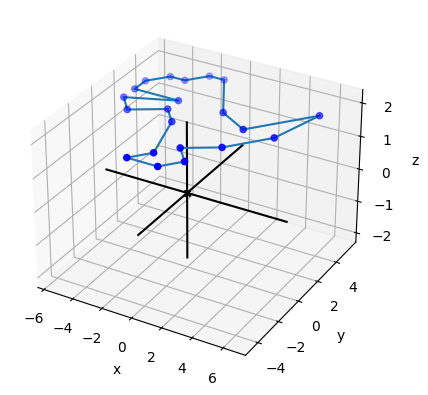

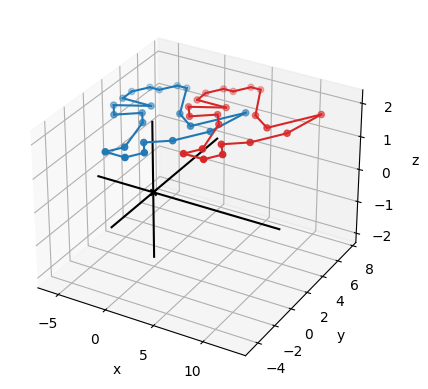

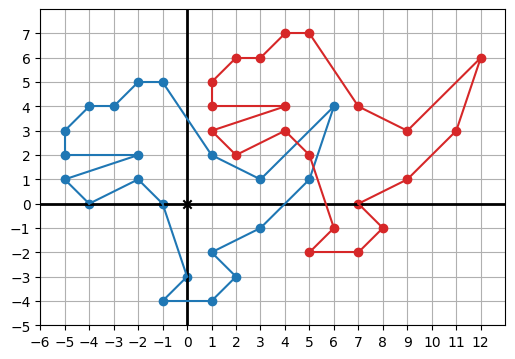

In [48]:
dino_3d = [(x,y,2) for x,y in dino_vectors]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d, color='C0')
)

translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]
draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d,color='C0'),
    Points3D(*translated,color='C3'),
    *polygon_segments_3d(translated,color='C3')
)

translated_2d = [(x,y) for (x,y,z) in translated]
draw(
    Points(*dino_vectors, color='C0'),
    Polygon(*dino_vectors, color='C0'),
    Points(*translated_2d, color='C3'),
    Polygon(*translated_2d, color='C3'),
    save_as='figures/ex_5.26_dino.svg'
)

5.27 x방향으로 -2단위만큼, y방향으로 -2단위만큼 평행이동하는 행렬을 만들어라. 공룡 도형에 실행한 결과는 어떠한가?

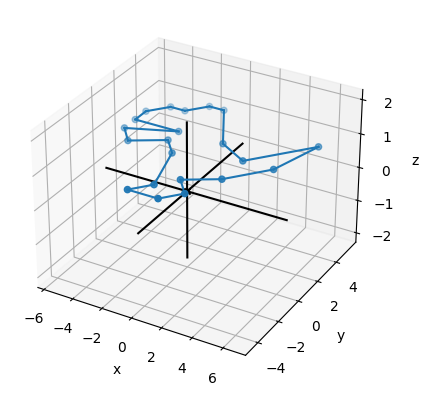

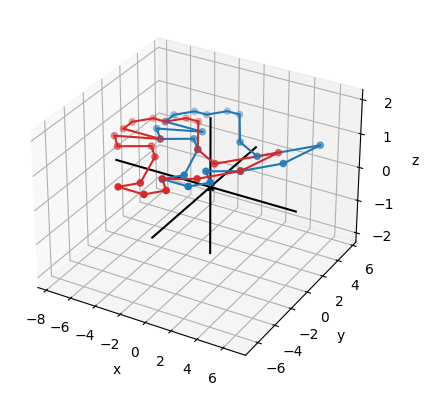

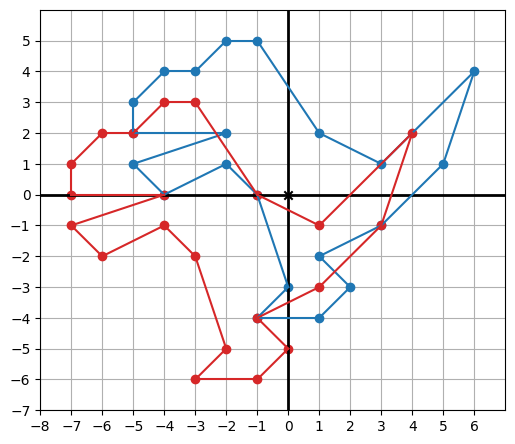

In [49]:
translation_matrix = ((1,0,-2),(0,1,-2),(0,0,1))

dino_3d = [(x,y,1) for x,y in dino_vectors]
draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d, color='C0')
)

translated = [multiply_matrix_vector(translation_matrix, v) for v in dino_3d]
draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d,color='C0'),
    Points3D(*translated,color='C3'),
    *polygon_segments_3d(translated,color='C3')
)

translated_2d = [(x,y) for (x,y,z) in translated]
draw(
    Points(*dino_vectors, color='C0'),
    Polygon(*dino_vectors, color='C0'),
    Points(*translated_2d, color='C3'),
    Polygon(*translated_2d, color='C3'),
    save_as='figures/ex_5.27_second_dino.svg'
)

5.31 translate_3d와 유사하게 4차원 벡터를 다른 4차원 벡터만큼 평행이동시키는 5X5 행렬을 이용하는 함수 translate_4d를 작성하라.

In [50]:
def translate_4d(translation):
    def new_function(target):
        a,b,c,d = translation
        x,y,z,w = target
        matrix = (
            (1,0,0,0,a),
            (0,1,0,0,b),
            (0,0,1,0,c),
            (0,0,0,1,d),
            (0,0,0,0,1))
        vector = (x,y,z,w,1)
        x_out,y_out,z_out,w_out,_ = multiply_matrix_vector(matrix,vector)
        return (x_out,y_out,z_out,w_out)
    return new_function

In [51]:
translate_4d((1,2,3,4))((10,20,30,40))

(11, 22, 33, 44)